#### About
> Data Analysis methods

Data analysis is the process of examining and interpreting data to gain insights and make informed decisions. Depending on the type of data and the problem to be solved, different data analysis methods can be used. 

Common data analysis methods are :



1. Descriptive Analysis: Descriptive analysis is used to summarize and describe the main features of a dataset, such as its mean, median, mode, range, and standard deviation. This method is useful for getting an overview of the dataset and understanding its general characteristics.



In [1]:
import seaborn as sns

# Load iris dataset
iris = sns.load_dataset('iris')

# Calculate summary statistics
print(iris.describe())

# Calculate correlation coefficients
print(iris.corr())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


/tmp/ipykernel_15580/125314826.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(iris.corr())


2. Inferential analysis - It typically involves hypothesis testing and estimation using statistical techniques.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')


In [4]:
# Define two groups to compare
group1 = df[df['sex'] == 'Male']['total_bill']
group2 = df[df['sex'] == 'Female']['total_bill']


In [5]:
# Calculate t-test statistic and p-value
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

# Print results
print('T-Test Results:')
print(f'T-Statistic: {t_stat:.4f}')
print(f'P-Value: {p_val:.4f}')

T-Test Results:
T-Statistic: 2.3734
P-Value: 0.0186


Since, P-value is less than 0.05 hence we reject the null hypothesis and conclude that means of the two groups are significantly different.

3. Regression Analysis - It is used to analyze the relationship between two or more variables.

<Axes: xlabel='total_bill', ylabel='tip'>

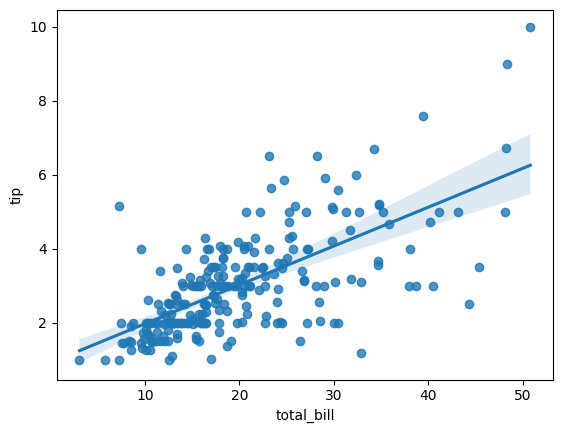

In [6]:
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Perform linear regression of tip on total_bill
sns.regplot(data=tips, x='total_bill', y='tip')

4. Time series analysis - It is used to analyze data that is collected over time. It involves identifying patterns and trends in the data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Load the AirPassengers dataset
airline = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', 
                      index_col='Month', parse_dates=['Month'])


In [9]:
# Display the first 5 rows of the dataset
airline.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


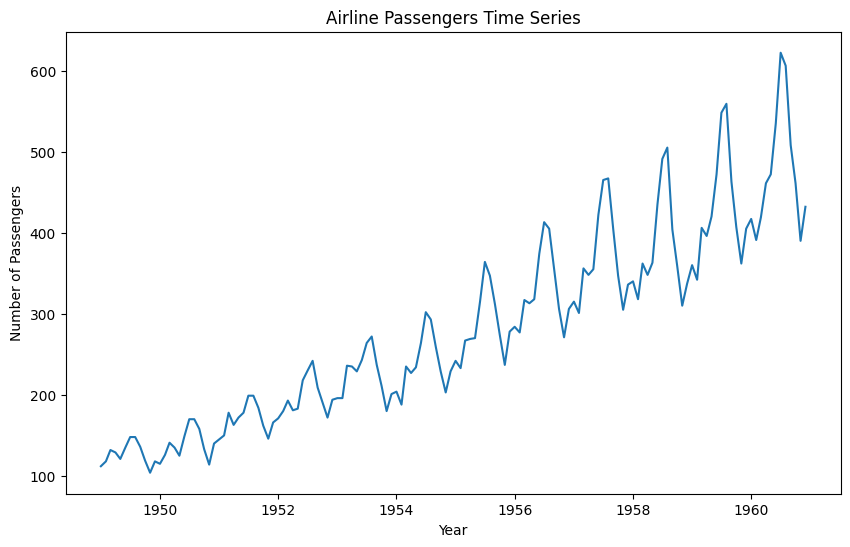

In [10]:
# Visualize the time series data
plt.figure(figsize=(10,6))
plt.plot(airline)
plt.title('Airline Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()


In [11]:
# Test for stationarity using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller


In [13]:
airline.columns

Index(['Passengers'], dtype='object')

In [14]:
result = adfuller(airline['Passengers'])


In [15]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The ADF statistic is a test statistic from the Augmented Dickey-Fuller (ADF) test. It is used to determine whether a time series data set is stationary or non-stationary. In this case, the ADF statistic is 0.815369.

The p-value is a measure of the probability that the null hypothesis (i.e., the data set is non-stationary) is true. In this case, the p-value is 0.991880, which is very high. A p-value greater than 0.05 indicates that the null hypothesis cannot be rejected at a significance level of 5%.

The critical values are values that represent the threshold for rejecting the null hypothesis. They are used to compare with the ADF statistic to determine whether the data set is stationary or non-stationary. In this case, the critical values are -3.482 (for 1% significance level), -2.884 (for 5% significance level), and -2.579 (for 10% significance level).

Since the ADF statistic is greater than all three critical values, and the p-value is very high, we cannot reject the null hypothesis. Therefore, the data set is likely to be non-stationary.

In [16]:
# Decompose the time series into its components
from statsmodels.tsa.seasonal import seasonal_decompose


In [17]:

decomp = seasonal_decompose(airline)


In [18]:
# Plot the decomposed components
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid


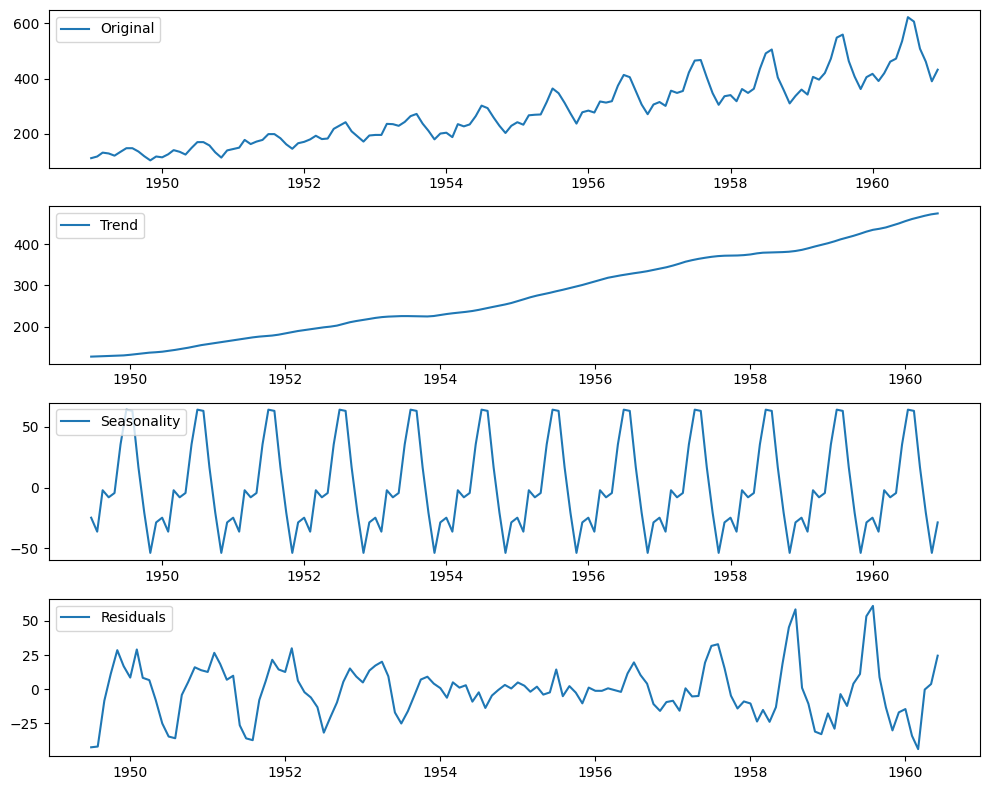

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(411)
plt.plot(airline, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [20]:
# Perform forecasting using the ARIMA model
from statsmodels.tsa.arima.model import ARIMA


In [21]:
# Fit the ARIMA model
model = ARIMA(airline, order=(2, 1, 2))
model_fit = model.fit()


/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
# Make predictions using the ARIMA model
predictions = model_fit.predict(start=len(airline), end=len(airline)+11, typ='levels')


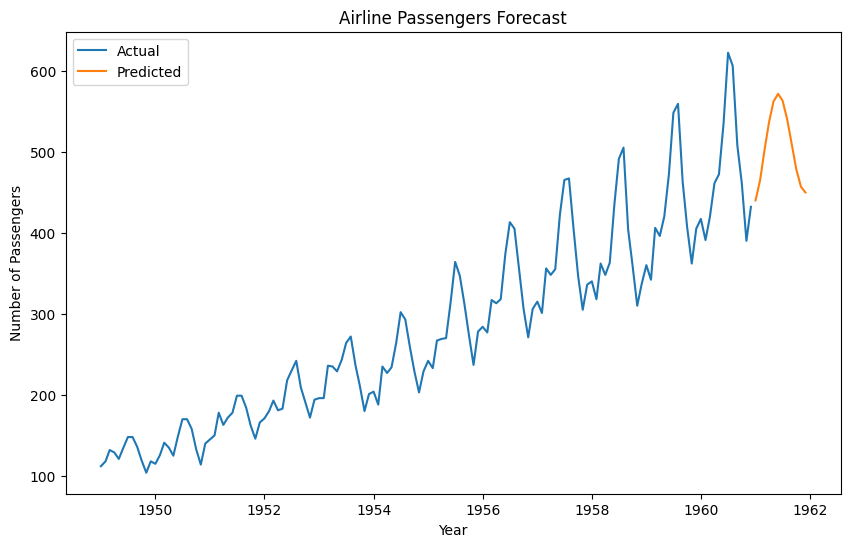

In [23]:
# Visualize the predictions
plt.figure(figsize=(10,6))
plt.plot(airline, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Airline Passengers Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.show()

5. Cluster analysis : It is used to group similar objects together based on their characteristics. It is used to identify patterns in data that are not immediately apparent. Use cases include customer segmentation, fraud detection and others.

In [24]:
from sklearn.cluster import KMeans
import seaborn as sns


In [25]:
iris = sns.load_dataset('iris')


In [26]:
# Cluster iris dataset into three clusters based on petal length and petal width
X = iris[['petal_length', 'petal_width']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
iris['cluster'] = kmeans.predict(X)


<Axes: xlabel='petal_length', ylabel='petal_width'>

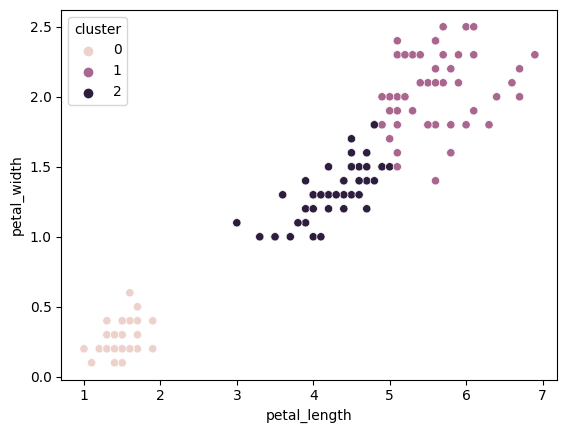

In [27]:
# Plot clusters
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

6. Factor analysis - It is used to identify underlying factors or dimensions that explain the variation in a dataset. It is often used to reduce the number of variables in a dataset and identify the most imp. factors driving the variation.

In [28]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis


In [30]:
# Load iris dataset
iris = load_iris()
X = iris.data


In [31]:
iris_df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])


In [32]:
# Perform factor analysis with 2 components
fa = FactorAnalysis(n_components=2)
fa.fit(X)


FactorAnalysis(n_components=2)

In [33]:
# Print factor loadings for each feature
loadings = pd.DataFrame(fa.components_.T, columns=['Factor 1', 'Factor 2'], index=iris_df.columns)
print(loadings)

              Factor 1  Factor 2
sepal_length  0.727461 -0.368746
sepal_width  -0.180852 -0.240590
petal_length  1.757902  0.035518
petal_width   0.731005  0.045266


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


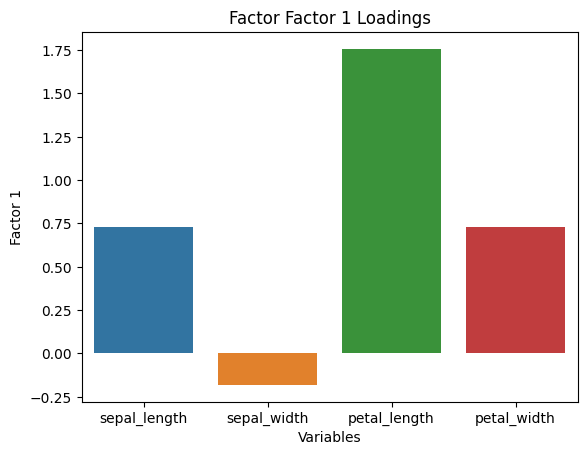

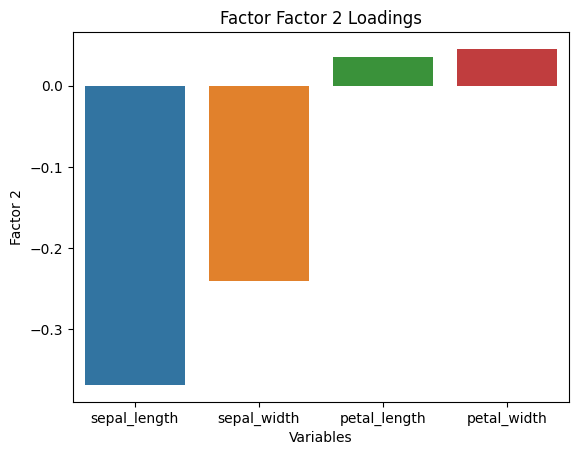

In [38]:
# Create a bar plot of the factor loadings
for factor in loadings.columns:
    sns.barplot(x=loadings.index, y=loadings[factor])
    plt.title(f'Factor {factor} Loadings')
    plt.xlabel('Variables')
    plt.show()

This code creates a series of bar plots, where each plot shows the factor loadings for one factor. For each plot, the x-axis represents the variable names, and the y-axis represents the factor loadings. The height of each bar indicates the strength of the relationship between the variable and the factor. Positive loadings indicate that the variable is positively associated with the factor, while negative loadings indicate a negative association.

